In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.isna().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(125)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(12205, 18)

In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [11]:
(df == "").any(axis=1).sum()

np.int64(0)

In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
continuous_cols = ["Administrative", 
                   "Administrative_Duration", 
                   "Informational", 
                   "Informational_Duration", 
                   "ProductRelated", 
                   "ProductRelated_Duration", 
                   "BounceRates", 
                   "ExitRates", 
                   "PageValues", 
                   "SpecialDay"]

In [14]:
categorical_cols = ["Month", 
                    "OperatingSystems",
                    "VisitorType",
                    "Browser",
                    "Region",
                    "TrafficType",
                    "Weekend",
                    "Revenue"]

In [15]:
# Calculate Q1, Q3, and IQR for all continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create a DataFrame showing whether each value is an outlier (True/False)
outlier_flags = (df[continuous_cols] < lower) | (df[continuous_cols] > upper)

# Optionally, count how many outliers per column
outlier_counts = outlier_flags.sum()

print("Outlier counts per column:\n", outlier_counts)

# If you want to see the actual rows with any outliers:
outlier_rows = df[outlier_flags.any(axis=1)]


Outlier counts per column:
 Administrative              404
Administrative_Duration    1149
Informational              2631
Informational_Duration     2405
ProductRelated             1007
ProductRelated_Duration     951
BounceRates                1428
ExitRates                  1325
PageValues                 2730
SpecialDay                 1249
dtype: int64


Task 2:

In [16]:
df["Month"].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [17]:
df['Month'] = df['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [18]:
df["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

In [19]:
df['VisitorType'] = df['VisitorType'].map({"Returning_Visitor":1, "New_Visitor" : 2, "Other" : 0})

In [20]:
df["Revenue"].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

In [21]:
# Check Revenue distribution (imbalance)
print("Revenue distribution before balancing:")
print(df["Revenue"].value_counts())
print("\nPercentage distribution:")
print(df["Revenue"].value_counts(normalize=True) * 100)

Revenue distribution before balancing:
Revenue
False    10297
True      1908
Name: count, dtype: int64

Percentage distribution:
Revenue
False    84.367063
True     15.632937
Name: proportion, dtype: float64


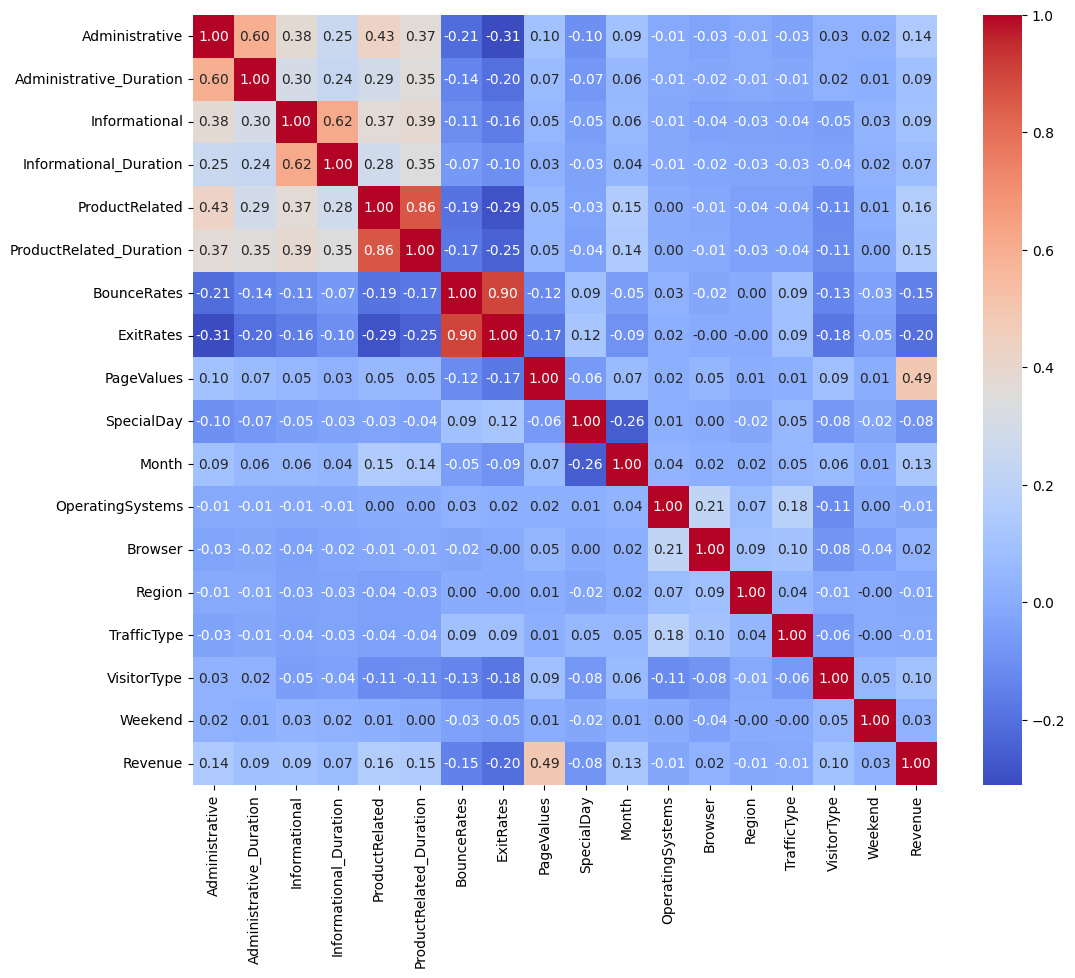

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',fmt=".2f", annot=True)
plt.show()

In [23]:
# Generate and display the correlation matrix with a gradient background
corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='Blues')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.094423,-0.006586,-0.025622,-0.007262,-0.034643,0.029424,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.056250,-0.007529,-0.015742,-0.006729,-0.014991,0.024208,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.062173,-0.009721,-0.038787,-0.030317,-0.035197,-0.048505,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.043552,-0.009734,-0.019573,-0.027891,-0.025126,-0.039760,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.154323,0.004194,-0.013586,-0.040108,-0.044223,-0.113693,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.135882,0.002870,-0.007724,-0.034869,-0.037390,-0.109336,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.054076,0.026811,-0.015501,0.002787,0.089184,-0.134669,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.086049,0.016345,-0.003323,-0.000987,0.087478,-0.181618,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.066244,0.018632,0.045908,0.010588,0.012286,0.087338,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,-0.259992,0.012806,0.003528,-0.016450,0.052856,-0.075330,-0.017723,-0.083601


For Revenue the features are going to be "PageValue", "ExitRate","BounceRate", "ProductRelated", "ProductRelated_Duration", "Administrative", "Month", "VisitorType"

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_save(model, X_train, y_train, X_test, y_test, model_name, results_dict):
    model.fit(X_train, y_train)

    print('Model accuracy for train set: {0:.3f}'.format(model.score(X_train, y_train)))
    print('Model accuracy for test set: {0:.3f}'.format(model.score(X_test, y_test)))
    
    y_pred = model.predict(X_test)

    # Classification Report
    print('\n{}'.format(classification_report(y_test, y_pred)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:\n', cm)

    # Accuracy Score
    auc = accuracy_score(y_test, y_pred)
    print('\nAccuracy Score: ', round(auc,3))
    
    # Collect metrics
    results_dict[model_name] = {
        'Train Accuracy': model.score(X_train, y_train),
        'Test Accuracy': model.score(X_test, y_test),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }
    
    return model, results_dict

In [25]:
def train_and_save_hyper(model, X_train, y_train, X_test, y_test, model_name, results_dict):
    model.fit(X_train, y_train)

    print('Model accuracy for train set: {0:.3f}'.format(model.score(X_train, y_train)))
    print('Model accuracy for test set: {0:.3f}'.format(model.score(X_test, y_test)))

    print("Best parameters found: ", model.best_params_)
    print("Best cross-validation score: ", model.best_score_)
    
    y_pred = model.predict(X_test)

    # Classification Report
    print('\n{}'.format(classification_report(y_test, y_pred)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:\n', cm)

    # Accuracy Score
    auc = accuracy_score(y_test, y_pred)
    print('\nAccuracy Score: ', round(auc,3))
    
    # Collect metrics
    results_dict[model_name] = {
        'Train Accuracy': model.score(X_train, y_train),
        'Test Accuracy': model.score(X_test, y_test),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }
    
    return model, results_dict

Classification

In [26]:
# Separating dependent and independent variables
X_class = df[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative", "Month", "VisitorType"]]
y_class = df["Revenue"]

In [27]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0, shuffle=True)

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_class, y_train_class)

In [29]:
from sklearn.preprocessing import RobustScaler
# Classification scaling
scaler = RobustScaler()

X_train_scaled_class = X_train_smote.copy()
X_test_scaled_class = X_test_class.copy()

X_train_scaled_class[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]] = scaler.fit_transform(X_train_smote[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]])
X_test_scaled_class[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]] = scaler.transform(X_test_class[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]])

results_class = {}

Logistic Regression

In [30]:
# LR model without hyperparameter tuning
LR = LogisticRegression()
model_LogR, results_class = train_and_save(LR, X_train_scaled_class, y_train_smote, X_test_scaled_class, y_test_class, "Logistic Regression", results_class)

Model accuracy for train set: 0.838
Model accuracy for test set: 0.870

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2063
        True       0.56      0.71      0.63       378

    accuracy                           0.87      2441
   macro avg       0.75      0.81      0.78      2441
weighted avg       0.89      0.87      0.88      2441


Confusion Matrix:
 [[1855  208]
 [ 109  269]]

Accuracy Score:  0.87


In [31]:
# Logistic Regression with hyperparameter tuning
params_log = {
    'C': [0.001, 0.01, 0.1, 1, 5],
    'solver': ['lbfgs'],
    'max_iter': [100,200,500]
}
skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params_log, n_jobs =-1, cv = skf)
model_LogR_hyper, results_class = train_and_save_hyper(LR_hyper, X_train_scaled_class, y_train_smote, X_test_scaled_class, y_test_class, "Logistic Regression Tuned", results_class)

Model accuracy for train set: 0.838
Model accuracy for test set: 0.870
Best parameters found:  {'C': 5, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score:  0.8373210690522406

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2063
        True       0.56      0.71      0.63       378

    accuracy                           0.87      2441
   macro avg       0.75      0.81      0.77      2441
weighted avg       0.89      0.87      0.88      2441


Confusion Matrix:
 [[1854  209]
 [ 109  269]]

Accuracy Score:  0.87


Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
model_RF, results_class = train_and_save(RF, X_train_scaled_class, y_train_smote, X_test_scaled_class, y_test_class, "Random Forest", results_class)

Model accuracy for train set: 1.000
Model accuracy for test set: 0.889

              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2063
        True       0.62      0.73      0.67       378

    accuracy                           0.89      2441
   macro avg       0.78      0.82      0.80      2441
weighted avg       0.90      0.89      0.89      2441


Confusion Matrix:
 [[1892  171]
 [ 101  277]]

Accuracy Score:  0.889


In [33]:
# Random Forest with hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 10],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

skf = StratifiedKFold(n_splits=10)
RF_hyper = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params_rf, n_jobs=-1, cv=skf)
model_RF_hyper, results_class = train_and_save_hyper(
    RF_hyper, X_train_scaled_class, y_train_smote, X_test_scaled_class, y_test_class, "Random Forest Tuned", results_class
)

Model accuracy for train set: 0.995
Model accuracy for test set: 0.888
Best parameters found:  {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.9250687394364066

              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2063
        True       0.62      0.71      0.66       378

    accuracy                           0.89      2441
   macro avg       0.78      0.82      0.80      2441
weighted avg       0.90      0.89      0.89      2441


Confusion Matrix:
 [[1897  166]
 [ 108  270]]

Accuracy Score:  0.888


Clustering

In [34]:
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# Select features for clustering (example: all continuous columns)
clustering_features = df.drop("Revenue", axis=1)

# Standardize features
scaler_cluster = RobustScaler()
X_cluster = scaler_cluster.fit_transform(clustering_features)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_cluster)
df['KMeans_Cluster'] = kmeans_labels

In [35]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster)
df['DBSCAN_Cluster'] = dbscan_labels

# Show cluster label counts
print('KMeans cluster counts:')
print(df['KMeans_Cluster'].value_counts())
print('\nDBSCAN cluster counts:')
print(df['DBSCAN_Cluster'].value_counts())

KMeans cluster counts:
KMeans_Cluster
0    11535
2      554
1      116
Name: count, dtype: int64

DBSCAN cluster counts:
DBSCAN_Cluster
 0     6661
-1     5326
 1       51
 7       38
 14      25
 12      19
 5       14
 2        8
 10       8
 15       7
 3        6
 11       6
 8        6
 17       6
 9        5
 16       5
 6        5
 4        5
 13       4
Name: count, dtype: int64


In [36]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(X_cluster, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

# Silhouette score for DBSCAN (ignore noise points)
dbscan_mask = dbscan_labels != -1
if dbscan_mask.sum() > 1 and len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_cluster[dbscan_mask], dbscan_labels[dbscan_mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.3f}")
else:
    print("DBSCAN did not form enough clusters for silhouette score.")

K-Means Silhouette Score: 0.884
DBSCAN Silhouette Score (excluding noise): -0.169


Retrain new model with cluster label

In [37]:
X_class_cluster = df[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative", "Month", "VisitorType", "KMeans_Cluster"]]
y_class_cluster = df["Revenue"]

In [38]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets for classification
X_class_cluster_train, X_class_cluster_test, y_train_cluster, y_test_cluster = train_test_split(X_class_cluster, y_class_cluster, test_size=0.2, random_state=0, shuffle=True)

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote_cluster, y_train_smote_cluster = smote.fit_resample(X_class_cluster_train, y_train_cluster)

In [40]:
from sklearn.preprocessing import RobustScaler
# Classification scaling
scaler = RobustScaler()

X_train_scaled_cluster = X_train_smote_cluster.copy()
X_test_scaled_cluster = X_class_cluster_test.copy()

X_train_scaled_cluster[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]] = scaler.fit_transform(X_train_smote_cluster[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]])
X_test_scaled_cluster[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]] = scaler.transform(X_class_cluster_test[["PageValues", "ExitRates","BounceRates", "ProductRelated", "ProductRelated_Duration", "Administrative"]])

In [41]:
# Random Forest with hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 10],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}
skf = StratifiedKFold(n_splits=10)
RF_hyper = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params_rf, n_jobs=-1, cv=skf)
model_RF_hyper_cluster, results_class = train_and_save_hyper(
    RF_hyper, X_train_scaled_cluster, y_train_smote_cluster, X_test_scaled_cluster, y_test_cluster, "Random Forest Tuned Cluster", results_class
)

Model accuracy for train set: 0.996
Model accuracy for test set: 0.889
Best parameters found:  {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score:  0.9257371368540024

              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2063
        True       0.62      0.71      0.66       378

    accuracy                           0.89      2441
   macro avg       0.78      0.82      0.80      2441
weighted avg       0.90      0.89      0.89      2441


Confusion Matrix:
 [[1901  162]
 [ 110  268]]

Accuracy Score:  0.889


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb.fit(X_train_scaled_cluster, y_train_smote_cluster)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [44]:
from sklearn.ensemble import VotingClassifier

hybrid_model = VotingClassifier(
    estimators=[('rf', model_RF_hyper_cluster.best_estimator_), ('gb', gb)],
    voting='soft'
)

hybrid_model.fit(X_train_scaled_cluster, y_train_smote_cluster)

,estimators,"[('rf', ...), ('gb', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,50
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2


In [45]:
from sklearn.metrics import classification_report

y_pred_hybrid = hybrid_model.predict(X_test_scaled_cluster)
print(classification_report(y_test_cluster, y_pred_hybrid))

              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2063
        True       0.63      0.71      0.67       378

    accuracy                           0.89      2441
   macro avg       0.79      0.82      0.80      2441
weighted avg       0.90      0.89      0.89      2441



In [42]:
# Logistic Regression with hyperparameter tuning
params_log = {
    'C': [0.001, 0.01, 0.1, 1, 5],
    'solver': ['lbfgs'],
    'max_iter': [100,200,500]
}
skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params_log, n_jobs =-1, cv = skf)
model_LogR_hyper_cluster, results_class = train_and_save_hyper(LR_hyper, X_train_scaled_cluster, y_train_smote_cluster, X_test_scaled_cluster, y_test_cluster, "Logistic Regression Tuned Cluster", results_class)

Model accuracy for train set: 0.838
Model accuracy for test set: 0.870
Best parameters found:  {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score:  0.8374426863969322

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2063
        True       0.56      0.71      0.63       378

    accuracy                           0.87      2441
   macro avg       0.75      0.80      0.77      2441
weighted avg       0.89      0.87      0.88      2441


Confusion Matrix:
 [[1855  208]
 [ 110  268]]

Accuracy Score:  0.87
